## Fake news classification


Fake news on different platforms is spreading widely and is a matter of serious concern, as it causes social wars and permanent breakage of the bonds established among people. A lot of research is already going on focused on the classification of fake news.

Here we will try to solve this issue with the help of machine learning in Python.

        

# Data description
    > id: An identifier for each sample.
    > title: The title of the news article.
    > author: The author or source of the news article.
    > text: The main content or body of the news article.
    > label: The label indicating whether the news article is fake or not 
        (e.g., binary label, where 0 represents genuine news and 1 represents fake news).

## Steps

     1)Importing libraries
     2)Read Data
     3)Data Preprocessing
     4)Featuring Engineering
     5)Model Training

In [1]:
# import the needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib as jb

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from math import sqrt
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')


## Read Data

reading the data into pandas dataframe

In [2]:
df=pd.read_csv('G:/ds project/files/train/raw/train.csv')

In [3]:
df

,id,title,author,text,label
0,3777,Four-Day Obama Trip in 2013 Cost US Taxpayers ...,NaN,Get short URL 0 4 0 0 President Barack Obama’s...,1
1,15265,A Hillary Clinton indictment is coming,Michael Snyder,VIDEOS A Hillary Clinton indictment is coming ...,1
2,16615,Snake in a suit: International prosecutor char...,NaN,"Radio Free Europe Tue, 25 Oct 2016 20:50 UTC A...",1
3,5111,Inviting the Easter Bunny to the Seder - The N...,Yotam Ottolenghi,I went on my first Easter egg hunt a couple of...,0
4,495,Contaminated Food from China Now Entering the ...,noreply@blogger.com (Alexander Light),Contaminated Food from China Now Entering the ...,1
...,...,...,...,...,...
14554,7763,Four Movies You Should Know About Before the G...,Wesley Morris and Jenna Wortham,"Last month, about 50 new movies opened in New ...",0
14555,15377,Terrorists attack police training college in P...,NaN,(7 fans) - Advertisement - At lease 60 cadets ...,1
14556,17730,Presidential Debate: Here’s What You Missed - ...,Alex Burns and Matt Flegenheimer,We analyzed in real time the second presidenti...,0
14557,15725,The Tragically Hip’s Gord Downie: A True Canad...,Alanna Ketler,For those of you who have no clue who Gord Dow...,1


## Data Preprocessing

In [4]:
#To see the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14559 entries, 0 to 14558
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      14559 non-null  int64 
 1   title   14162 non-null  object
 2   author  13184 non-null  object
 3   text    14530 non-null  object
 4   label   14559 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 568.8+ KB


In [5]:
df.describe(include="all")

,id,title,author,text,label
count,14559.000000,14162,13184,14530,14559.000000
unique,NaN,13919,3360,14282,NaN
top,NaN,Thomas Frank Explores Whether Hillary Clinton ...,Pam Key,,NaN
freq,NaN,4,163,57,NaN
mean,10371.066282,NaN,NaN,NaN,0.503194
std,6009.437248,NaN,NaN,NaN,0.500007
min,0.000000,NaN,NaN,NaN,0.000000
25%,5151.500000,NaN,NaN,NaN,0.000000
50%,10351.000000,NaN,NaN,NaN,1.000000
75%,15572.500000,NaN,NaN,NaN,1.000000


In [6]:
# The shape of the dataset can be found by the below code.
df.shape

(14559, 5)

In [7]:
#TO see nunique values in dataset
df.nunique()

id        14559
title     13919
author     3360
text      14282
label         2
dtype: int64

In [8]:
#we have to check if ther is any null value in dataset
df.isnull().sum()

id           0
title      397
author    1375
text        29
label        0
dtype: int64

# Feature engineering 

In [9]:
# Target and label

x=df.drop('label',axis=1).copy()
y=df['label'].copy()


In [10]:
x

,id,title,author,text
0,3777,Four-Day Obama Trip in 2013 Cost US Taxpayers ...,NaN,Get short URL 0 4 0 0 President Barack Obama’s...
1,15265,A Hillary Clinton indictment is coming,Michael Snyder,VIDEOS A Hillary Clinton indictment is coming ...
2,16615,Snake in a suit: International prosecutor char...,NaN,"Radio Free Europe Tue, 25 Oct 2016 20:50 UTC A..."
3,5111,Inviting the Easter Bunny to the Seder - The N...,Yotam Ottolenghi,I went on my first Easter egg hunt a couple of...
4,495,Contaminated Food from China Now Entering the ...,noreply@blogger.com (Alexander Light),Contaminated Food from China Now Entering the ...
...,...,...,...,...
14554,7763,Four Movies You Should Know About Before the G...,Wesley Morris and Jenna Wortham,"Last month, about 50 new movies opened in New ..."
14555,15377,Terrorists attack police training college in P...,NaN,(7 fans) - Advertisement - At lease 60 cadets ...
14556,17730,Presidential Debate: Here’s What You Missed - ...,Alex Burns and Matt Flegenheimer,We analyzed in real time the second presidenti...
14557,15725,The Tragically Hip’s Gord Downie: A True Canad...,Alanna Ketler,For those of you who have no clue who Gord Dow...


In [11]:
y

0        1
1        1
2        1
3        0
4        1
        ..
14554    0
14555    1
14556    0
14557    1
14558    1
Name: label, Length: 14559, dtype: int64

# Feature Encoding

In [12]:
encoder=OrdinalEncoder()
x_encode=encoder.fit(x)
x_encode

OrdinalEncoder()

In [13]:
jb.dump(x_encode,"G:/ds project/files/train/model/x_encode.pkl")

['G:/ds project/files/train/model/x_encode.pkl']

In [14]:
x_encode=encoder.transform(x)
x_encode_df=pd.DataFrame(x_encode,columns=x.columns)
x_encode_df

,id,title,author,text
0,2673.0,4490.0,NaN,4944.0
1,10709.0,427.0,2142.0,12151.0
2,11640.0,10113.0,NaN,9313.0
3,3613.0,5984.0,3125.0,5727.0
4,340.0,2844.0,3262.0,3516.0
...,...,...,...,...
14554,5477.0,4487.0,3086.0,6724.0
14555,10786.0,10661.0,NaN,672.0
14556,12414.0,8799.0,114.0,13021.0
14557,11018.0,11131.0,110.0,4661.0


In [15]:
x_encode_df.to_csv("G:/ds project/files/train/processed/x_encode_df.csv")


# Imputation to replace null and nan 

In [16]:
#replace  null 
imputer=KNNImputer()
x_impute=imputer.fit(x_encode_df)
x_impute

KNNImputer()

In [17]:
jb.dump(x_impute,"G:/ds project/files/train/model/x_impute.pkl")

['G:/ds project/files/train/model/x_impute.pkl']

In [18]:
x_impute=imputer.transform(x_encode_df)
x_impute_columns=imputer.get_feature_names_out()
x_impute=pd.DataFrame(x_impute)
x_impute.columns=x_impute_columns
X=x_impute
X

,id,title,author,text
0,2673.0,4490.0,1796.4,4944.0
1,10709.0,427.0,2142.0,12151.0
2,11640.0,10113.0,1464.6,9313.0
3,3613.0,5984.0,3125.0,5727.0
4,340.0,2844.0,3262.0,3516.0
...,...,...,...,...
14554,5477.0,4487.0,3086.0,6724.0
14555,10786.0,10661.0,2217.6,672.0
14556,12414.0,8799.0,114.0,13021.0
14557,11018.0,11131.0,110.0,4661.0


In [19]:
X.to_csv("G:/ds project/files/train/processed/X.csv")

In [20]:
x_impute.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

<AxesSubplot: >

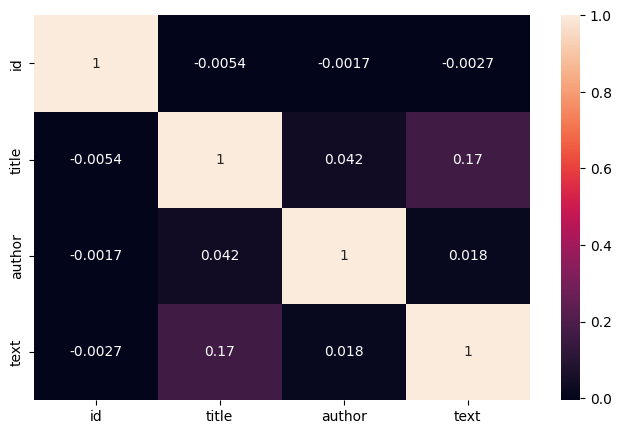

In [21]:
plt.figure(figsize=(8,5))
sns.heatmap(X.corr(),annot=True)

# Outliers detection 

<AxesSubplot: >

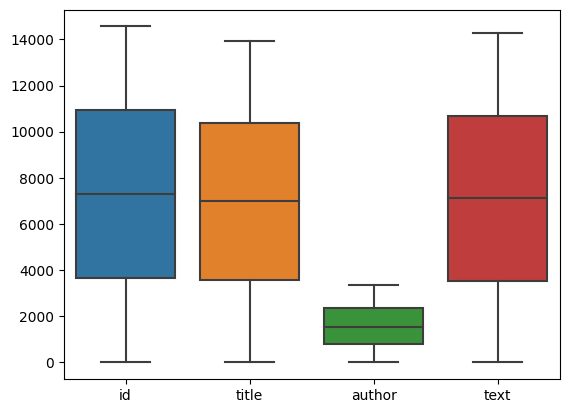

In [22]:
sns.boxplot(X)

<AxesSubplot: >

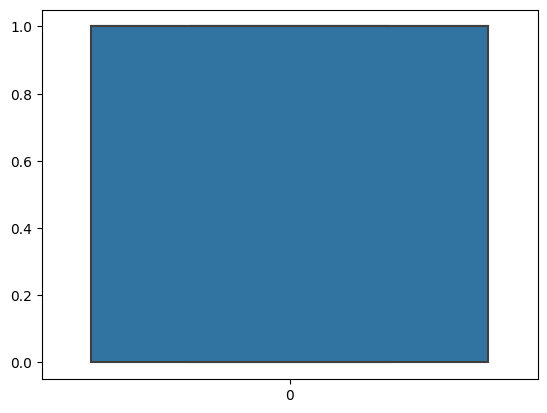

In [23]:

sns.boxplot(y)

    There is no outliers in this data frame , 

 # Split=train_test_split

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y, train_size=0.7,random_state=123)

In [25]:
X_train.to_csv('G:/ds project/files/train/raw/x_train.csv',index=False)
y_train.to_csv('G:/ds project/files/train/raw/y_train.csv',index=False)

X_test.to_csv('G:/ds project/files/evoluate/x_test.csv',index=False)
y_test.to_csv('G:/ds project/files/evoluate/y_test.csv',index=False)

# Model train

In [26]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print('Train score:',model.score(X_train,y_train)* 100)


Train score: 96.79128642920224


In [27]:
jb.dump(model,"G:/ds project/files/train/model/model.pkl")

['G:/ds project/files/train/model/model.pkl']

In [28]:
model=jb.load("G:/ds project/files/train/model/model.pkl")
impute_model=jb.load("G:/ds project/files/train/model/x_impute.pkl")
encode_model=jb.load("G:/ds project/files/train/model/x_encode.pkl")

In [29]:
y_pred=pd.DataFrame(model.predict(X_test))
y_pred

,0
0,1
1,0
2,1
3,1
4,1
...,...
4363,1
4364,1
4365,0
4366,1


In [30]:
print('Test score:',model.score(X_test,y_test)* 100)

Test score: 90.59065934065934


In [31]:
print(classification_report(y_pred,y_test))
cm=confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2199
           1       0.90      0.91      0.91      2169

    accuracy                           0.91      4368
   macro avg       0.91      0.91      0.91      4368
weighted avg       0.91      0.91      0.91      4368



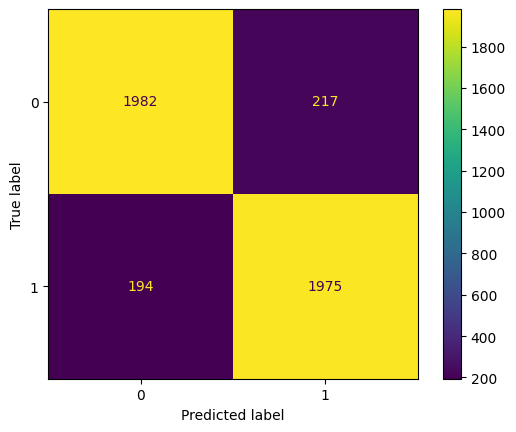

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()